In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('figure', figsize = (10, 10))

In [2]:
import matplotlib.style as style
style.available
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

In [3]:
path = "dadosAgrupados.csv"
dadosEnem = pd.read_csv(path,sep=';',encoding='latin1')

In [4]:
dadosEnem.query('NU_NOTA_REDACAO < 60')['NU_NOTA_REDACAO']

25602     40.0
25680     40.0
31399     40.0
137147    40.0
225784    40.0
241950    40.0
351819    40.0
360740    40.0
365987    40.0
391204    40.0
394587    40.0
410168    40.0
459020    40.0
480878    40.0
504424    40.0
517874    40.0
576017    40.0
579502    40.0
579934    40.0
581117    40.0
687318    40.0
710898    40.0
830661    40.0
879967    40.0
882484    40.0
Name: NU_NOTA_REDACAO, dtype: float64

In [5]:
order=['NaoSabe','FundamentalIncompleto','FundamentalCompleto','Medio','Superior']

In [85]:
def my_boxplot(Grupo,var1,var2,G):
    fig, ax = plt.subplots(figsize=(8, 8))
    df = Grupo
    #escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
    G = sns.boxplot(x=var1, y=var2, data=df, order=['NaoSabe','FundamentalIncompleto','FundamentalCompleto','Medio','Superior'])
    G.set_xticklabels(G.get_xticklabels(),rotation=-30)
    G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
    G.set_xlabel(" ")
    G.set_ylabel(" ")


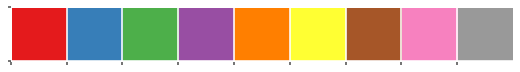

In [6]:
sns.palplot(sns.color_palette("Set1"))
sns.set_palette(sns.color_palette("Set1"))


Text(0, 0.5, ' ')

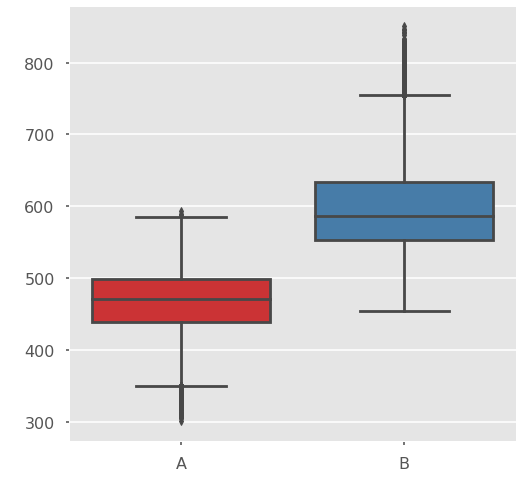

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))

df = dadosEnem
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="Cluster", y="NU_MEDIA", data=df)

#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xticklabels(["A","B"])
G.set_xlabel(" ")
G.set_ylabel(" ")


Text(0, 0.5, 'Frequência (%)')

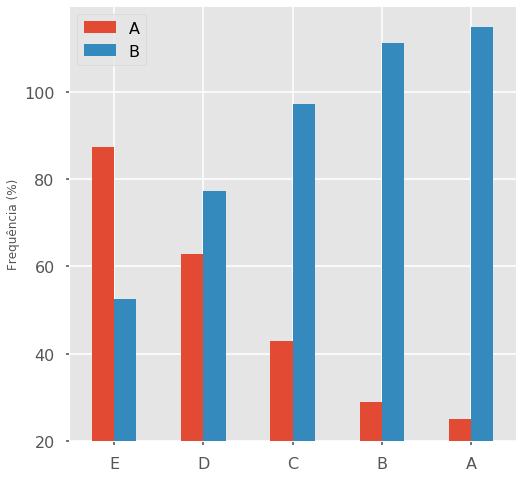

In [10]:
social = {} 
total_ClasseSocial_A = dadosEnem.query("ClasseSocial == 'A'").shape[0]
ClasseSocial_A_A = dadosEnem.query("ClasseSocial == 'A' and Cluster == 0").shape[0]/total_ClasseSocial_A
ClasseSocial_A_B = dadosEnem.query("ClasseSocial == 'A' and Cluster == 1").shape[0]/total_ClasseSocial_A
                                      
                                       
total_ClasseSocial_B = dadosEnem.query("ClasseSocial == 'B'").shape[0]
ClasseSocial_B_A = dadosEnem.query("ClasseSocial == 'B' and Cluster == 0").shape[0]/total_ClasseSocial_B
ClasseSocial_B_B = dadosEnem.query("ClasseSocial == 'B' and Cluster == 1").shape[0]/total_ClasseSocial_B
                                       
total_ClasseSocial_C = dadosEnem.query("ClasseSocial == 'C'").shape[0]
ClasseSocial_C_A = dadosEnem.query("ClasseSocial == 'C' and Cluster == 0").shape[0]/total_ClasseSocial_C
ClasseSocial_C_B = dadosEnem.query("ClasseSocial == 'C' and Cluster == 1").shape[0]/total_ClasseSocial_C

total_ClasseSocial_D = dadosEnem.query("ClasseSocial == 'D'").shape[0]
ClasseSocial_D_A = dadosEnem.query("ClasseSocial == 'D' and Cluster == 0").shape[0]/total_ClasseSocial_D
ClasseSocial_D_B = dadosEnem.query("ClasseSocial == 'D' and Cluster == 1").shape[0]/total_ClasseSocial_D


total_ClasseSocial_E = dadosEnem.query("ClasseSocial == 'E'").shape[0]
ClasseSocial_E_A = dadosEnem.query("ClasseSocial == 'E' and Cluster == 0").shape[0]/total_ClasseSocial_E
ClasseSocial_E_B = dadosEnem.query("ClasseSocial == 'E' and Cluster == 1").shape[0]/total_ClasseSocial_E


classePorCluster = [ClasseSocial_A_A,ClasseSocial_A_B,ClasseSocial_B_A,ClasseSocial_B_B,ClasseSocial_C_A,ClasseSocial_C_B,ClasseSocial_D_A,ClasseSocial_D_B,ClasseSocial_E_A,ClasseSocial_E_B]
teste = pd.DataFrame({'A':classePorCluster[:2],'B':classePorCluster[2:4],'C':classePorCluster[4:6],'D':classePorCluster[6:8],'E':classePorCluster[8:10]})
df = teste.T
df.columns = ['A','B']
df = df.iloc[::-1]


ax = df.plot(kind='bar',figsize=(8, 8))
ax.set_yticklabels(['20','40','60','80','100'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.set_ylabel("Frequência (%)")




In [11]:
dadosEnem['RendaMaxima'].value_counts()

998      231721
1497     223484
2495      92246
1996      77677
3992      63696
2994      40095
0         38603
4990      35434
5988      30528
19960     21297
6986      15216
7984      12004
11976     11975
14970      9691
8982       8546
9980       8375
Name: RendaMaxima, dtype: int64

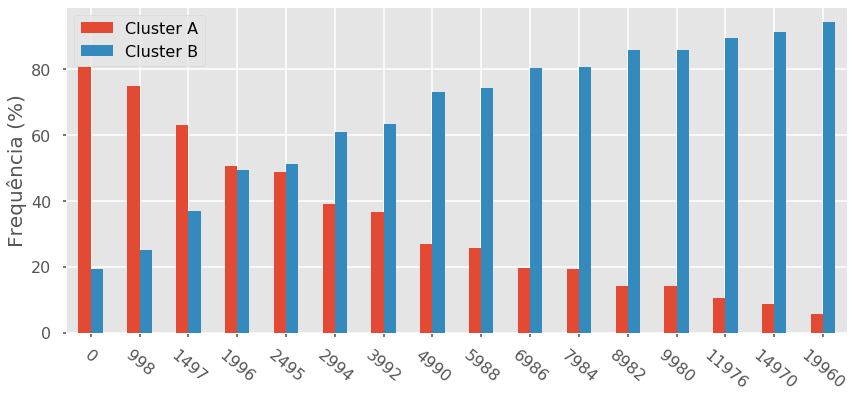

In [12]:
rendas = [] 
limites = ['0','998','1497','1996','2495','2994','3992','4990','5988','6986','7984','8982','9980','11976','14970','19960']

for var in limites:
    total_Renda = dadosEnem.query("RendaMaxima == " + var).shape[0]                                      
    rendas.append(dadosEnem.query("RendaMaxima == " + var + "and Cluster == 0").shape[0]/total_Renda)
    rendas.append(dadosEnem.query("RendaMaxima == " + var +  "and Cluster == 1").shape[0]/total_Renda)    



teste = pd.DataFrame({'0':rendas[:2], '998':rendas[2:4],'1497':rendas[4:6],'1996':rendas[6:8],'2495':rendas[8:10],
                      '2994':rendas[10:12],
                      '3992':rendas[12:14],'4990':rendas[14:16],'5988':rendas[16:18],'6986':rendas[18:20],'7984':rendas[20:22],
                      '8982':rendas[22:24],'9980':rendas[24:26],'11976':rendas[26:28],'14970':rendas[28:30],'19960':rendas[30:32]})

df = teste.T
df.columns = ['Cluster A','Cluster B']



ax = df.plot(kind='bar',figsize=(14, 6))

ax.set_yticklabels(['0','20','40','60','80','100'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=-40)
text = ax.set_ylabel("Frequência (%)")
text.set_fontsize(20)
    



In [13]:
var = limites[0]
total_Renda = dadosEnem.query("TP_DEPENDENCIA_ADM_ESC == 'Estadual'" ).shape[0]   

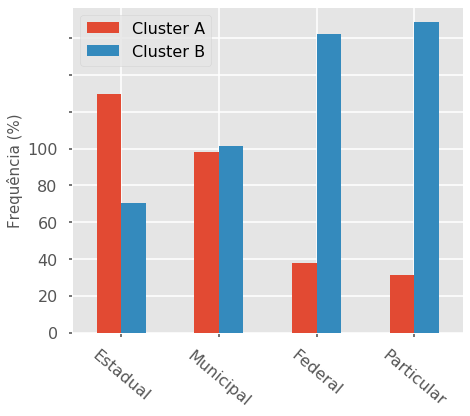

In [18]:
rendas = [] 
limites = ["'Estadual'","'Municipal'","'Federal'","'Particular'"]

for var in limites:
    total = dadosEnem.query("TP_DEPENDENCIA_ADM_ESC == " + var).shape[0]                                      
    rendas.append(dadosEnem.query("TP_DEPENDENCIA_ADM_ESC == " + var + "and Cluster == 0").shape[0]/total)
    rendas.append(dadosEnem.query("TP_DEPENDENCIA_ADM_ESC == " + var +  "and Cluster == 1").shape[0]/total)    



teste = pd.DataFrame({'Estadual':rendas[:2], 'Municipal':rendas[2:4],'Federal':rendas[4:6],'Particular':rendas[6:8]})

df = teste.T
df.columns = ['Cluster A','Cluster B']



ax = df.plot(kind='bar',figsize=(7,6))
ax.set_yticklabels(['0','20','40','60','80','100'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=-40)
text = ax.set_ylabel("Frequência (%)")
text.set_fontsize(15)    


In [54]:
dadosEnem.groupby('Cluster')['NU_MEDIA'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
A,497288.0,467.342694,39.763624,301.26,439.52,471.14,498.86,593.42
B,423300.0,597.878722,55.544900,455.14,553.40,587.12,633.92,850.82


In [23]:
for var in limites:
    limites = ["'NaoBranco'","'Branco'","'NaoDeclarado'"]
    total = dadosEnem.query("COR_RACA == " + var).shape[0]    
    print(total)
    

18628

Text(0, 0.5, 'Frequência (%)')

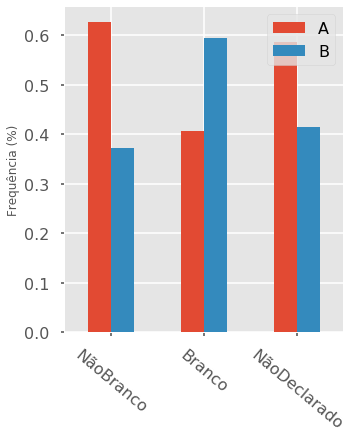

In [24]:
rendas = [] 
limites = ["'NaoBranco'","'Branco'","'NaoDeclarado'"]

for var in limites:
    total = dadosEnem.query("COR_RACA == " + var).shape[0]                                      
    rendas.append(dadosEnem.query("COR_RACA == " + var + "and Cluster == 0").shape[0]/total)
    rendas.append(dadosEnem.query("COR_RACA == " + var +  "and Cluster == 1").shape[0]/total)    



teste = pd.DataFrame({'NãoBranco':rendas[:2], 'Branco':rendas[2:4],'NãoDeclarado':rendas[4:6]})

df = teste.T
df.columns = ['A','B']



ax = df.plot(kind='bar',figsize=(5, 6))
#ax.set_yticklabels(['20','40','60','80','100'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=-40)
ax.set_ylabel("Frequência (%)")
    


In [25]:
rendas = [] 
limites = ["'< 452.99'","'452.99 - 585.6'","'585.6 - 718.21'","'≥ 718.21'"]

for var in limites:
    total = dadosAgrupados.query("mediaNota == " + var).shape[0] 
    print(dadosAgrupados.query("mediaNota == " + var + "and TP_COR_RACA == 'NãoBranco'").shape[0])
    rendas.append(dadosAgrupados.query("mediaNota == " + var + "and TP_COR_RACA == 'NãoBranco'").shape[0]/total)
    rendas.append(dadosAgrupados.query("mediaNota == " + var +  "and TP_COR_RACA == 'Branco'").shape[0]/total)
    rendas.append(dadosAgrupados.query("mediaNota == " + var +  "and TP_COR_RACA == 'NãoDeclarado'").shape[0]/total)   



data = pd.DataFrame({
    '< 452.99':rendas[:3], '452.99 - 585.6':rendas[3:6],'585.6 - 718.21':rendas[6:9], '≥ 718.21': rendas[9:12] })

data = data.T
data.columns = ['Não-Branco','Branco','Não Declarado']


ax = data.plot(kind='bar',figsize=(7, 6))
#ax.set_yticklabels(['20','40','60','80','100'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=-15)
text = ax.set_ylabel("Frequência (%)")
legend = ax.legend(bbox_to_anchor=(1.1, 1.05))   
text.set_fontsize(20)
    


NameError: name 'dadosAgrupados' is not defined

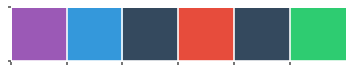

In [26]:
flatui = ["#9b59b6", "#3498db", "#34495e", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))
sns.set_palette(sns.color_palette(flatui))


In [78]:
sns.choose_colorbrewer_palette("qualitative")
#qualitative
#sequential

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804),
 (0.3019607843137256, 0.6862745098039216, 0.29019607843137263),
 (0.5960784313725492, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (0.9999999999999998, 1.0, 0.19999999999999996),
 (0.6509803921568629, 0.33725490196078434, 0.1568627450980391),
 (0.9686274509803922, 0.5058823529411766, 0.7490196078431374),
 (0.6, 0.6, 0.6)]

In [56]:
my_pal = [(0.9575547866205305, 0.9575547866205305, 0.9575547866205305),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.342883506343714, 0.342883506343714, 0.342883506343714),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]



In [27]:
dadosEnem['Cluster'].replace(to_replace =[0], value ='A',inplace=True) 
dadosEnem['Cluster'].replace(to_replace =[1], value ='B',inplace=True) 
dadosEnem

,TP_SEXO,TP_COR_RACA,CO_ESCOLA,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,...,RendaMaxima,ClasseSocial,anosEstudoPai,anosEstudoMae,COR_RACA,RazaoPessoasQuarto,PessoasPorQuarto,NU_MEDIA,MEDIA_FAIXA,Cluster
0,F,Branco,15230023.0,Paragominas,PA,Particular,Urbano,574.2,538.7,582.6,...,1497,E,0,12,Branco,0.75,"(0, 1]",581.40,"(576.04, 713.43]",B
1,F,Parda,15042626.0,Belém,PA,Estadual,Urbano,369.7,398.2,395.6,...,998,E,4,4,NaoBranco,4.00,"(3, 4]",423.46,"(0.0, 438.65]",A
2,F,Parda,15045560.0,Castanhal,PA,Estadual,Urbano,376.4,354.7,525.8,...,1497,E,4,9,NaoBranco,1.50,"(1, 2]",461.26,"(438.65, 576.04]",A
3,F,Parda,15038378.0,Belém,PA,Estadual,Urbano,423.0,372.8,488.7,...,1497,E,12,12,NaoBranco,3.00,"(2, 3]",468.20,"(438.65, 576.04]",A
4,F,Parda,15582949.0,Paragominas,PA,Estadual,Urbano,412.5,417.2,485.1,...,1497,E,12,12,NaoBranco,1.50,"(1, 2]",468.20,"(438.65, 576.04]",A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920583,F,Branco,31103527.0,João Monlevade,MG,Estadual,Urbano,533.3,485.8,530.2,...,998,E,9,12,Branco,2.50,"(2, 3]",536.96,"(438.65, 576.04]",B
920584,F,Branco,31174688.0,Três Pontas,MG,Estadual,Urbano,486.2,543.4,560.3,...,7984,C,16,16,Branco,1.50,"(1, 2]",573.02,"(438.65, 576.04]",B
920585,F,Preta,31253227.0,Ouro Preto,MG,Federal,Urbano,500.8,563.2,555.3,...,4990,C,16,18,NaoBranco,1.67,"(1, 2]",568.42,"(438.65, 576.04]",B
920586,F,Parda,31009107.0,Uberlândia,MG,Federal,Urbano,491.6,549.3,586.8,...,7984,C,12,18,NaoBranco,1.33,"(1, 2]",580.24,"(576.04, 713.43]",B


from pandas.plotting import parallel_coordinates

sample = dadosEnem.query("Nome_Mesorregiao == 'Zona da Mata'")

parallel_coordinates(sample[['NU_NOTA_CN','NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','Cluster']], 'Cluster',color=[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),(0.21568627450980393, 0.4941176470588236, 0.7215686274509804)])

In [66]:
sns.choose_colorbrewer_palette("qualitative")

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804),
 (0.3019607843137256, 0.6862745098039216, 0.29019607843137263),
 (0.5960784313725492, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (0.9999999999999998, 1.0, 0.19999999999999996),
 (0.6509803921568629, 0.33725490196078434, 0.1568627450980391),
 (0.9686274509803922, 0.5058823529411766, 0.7490196078431374),
 (0.6, 0.6, 0.6)]

In [58]:
A = dadosEnem.query("Cluster == 'A'")[notas[0]].median()
A

423.0

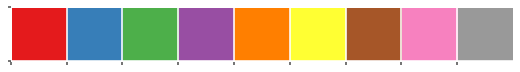

In [56]:
sns.palplot(sns.color_palette("Set1"))


-----
-----
-----
-----
-----
-----


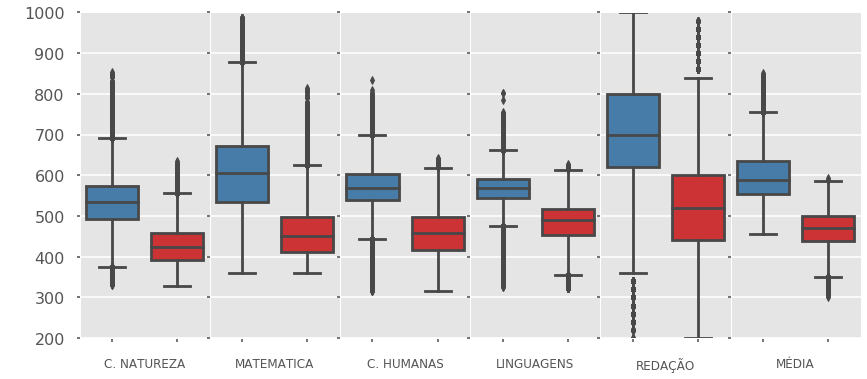

In [68]:
sns.set_palette(sns.color_palette("Set1"))
colors=[(0.21568627450980393, 0.4941176470588236, 0.7215686274509804),(0.8941176470588235, 0.10196078431372557, 0.10980392156862737)]


area = plt.figure(figsize=(14, 6))
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
notas = ['NU_NOTA_CN','NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','NU_MEDIA']
nomes = ['C. NATUREZA','MATEMATICA','C. HUMANAS','LINGUAGENS','REDAÇÃO','MÉDIA']
for i in range(len(notas)):
    g = area.add_subplot(1, 6, i+1)
    g = sns.boxplot(x="Cluster", y=notas[i], data=dadosEnem,palette=colors)
    #print(notas[i])
#     A = dadosEnem.query("Cluster == 'A'")[notas[i]].median()
#     B = dadosEnem.query("Cluster == 'B'")[notas[i]].median()
#     print("Notas Custer A", A)
#     print("Notas Custer B", B )
#     print("Diferença: ", B - A)
    print("-----")
    g.set_ylabel(" ")
    g.set_xlabel(nomes[i])
    g.set_ylim(200,1001)
    g.set_xticklabels("")
    if(i!=0):
        g.set_yticklabels("")
       



plt.subplots_adjust(wspace = 0)


#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
#G.set_xlabel(" ")
#G.set_ylabel(" ")

In [60]:
#randaMaxByCluster = dadosEnem.Cluster.value_counts()
#ax = sns.barplot(x="RendaMaxima", y="mediaNota", hue="Cluster",data=dadosEnem, estimator=lambda x: sum(x==0)*100.0/len(x))

In [41]:
dadosEnem.columns

Index(['TP_SEXO', 'TP_COR_RACA', 'CO_ESCOLA', 'NO_MUNICIPIO_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA',
       'NU_NOTA_REDACAO', 'CO_UF_ESC', 'Estudo Pai', 'Estudo Mãe',
       'Trabalho Pai', 'Trabalho Mãe', 'Tem Celular', 'Tem Computador',
       'Tem Internet', 'RendaMaxima', 'ClasseSocial', 'anosEstudoPai',
       'anosEstudoMae', 'COR_RACA', 'RazaoPessoasQuarto', 'PessoasPorQuarto',
       'NU_MEDIA', 'MEDIA_FAIXA', 'Cluster'],
      dtype='object')

Text(0, 0.5, ' ')

<Figure size 921.6x633.6 with 0 Axes>

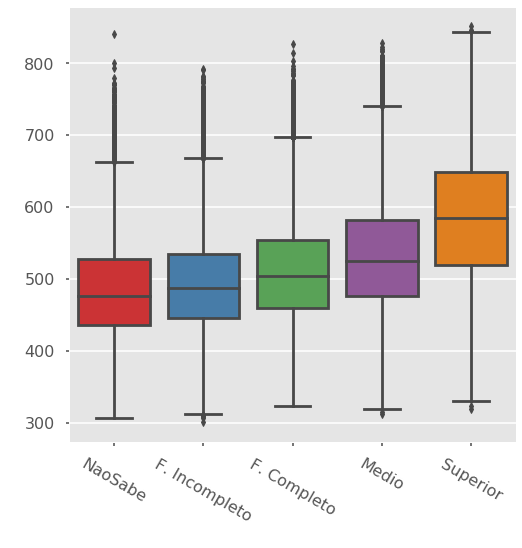

In [69]:
# sns.set_palette(sns.color_palette("Oranges"))
area = plt.figure()


area.tight_layout(pad=10)


fig, ax = plt.subplots(figsize=(8, 8))
G = sns.boxplot(x="Estudo Mãe", y="NU_MEDIA", data=dadosEnem, order=['NaoSabe','FundamentalIncompleto','FundamentalCompleto','Medio','Superior'])
G.set_xticklabels(G.get_xticklabels(),rotation=-30)
G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")



Text(0, 0.5, ' ')

<Figure size 921.6x633.6 with 0 Axes>

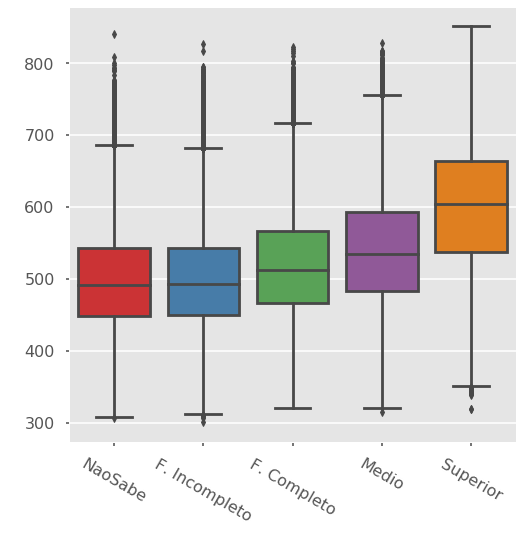

In [84]:
# sns.set_palette(sns.color_palette("Oranges"))
area = plt.figure()


area.tight_layout(pad=10)


fig, ax = plt.subplots(figsize=(8, 8))
G = sns.boxplot(x="Estudo Pai", y="NU_MEDIA", data=dadosEnem, order=['NaoSabe','FundamentalIncompleto','FundamentalCompleto','Medio','Superior'])
G.set_xticklabels(G.get_xticklabels(),rotation=-30)
G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")


Text(0, 0.5, ' ')

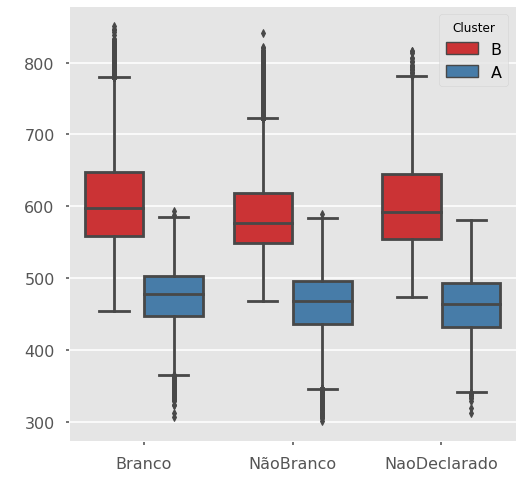

In [70]:
dadosEnem['TP_COR_RACA'].replace(to_replace =['Preta','Parda','Amarelo','Indigena'], value ='NãoBranco',inplace=True) 
dadosEnem['TP_COR_RACA'].replace(to_replace =[1], value ='B',inplace=True) 
fig, ax = plt.subplots(figsize=(8, 8))
df = dadosEnem
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="TP_COR_RACA", y="NU_MEDIA", hue="Cluster",data=df)
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")

Text(0, 0.5, ' ')

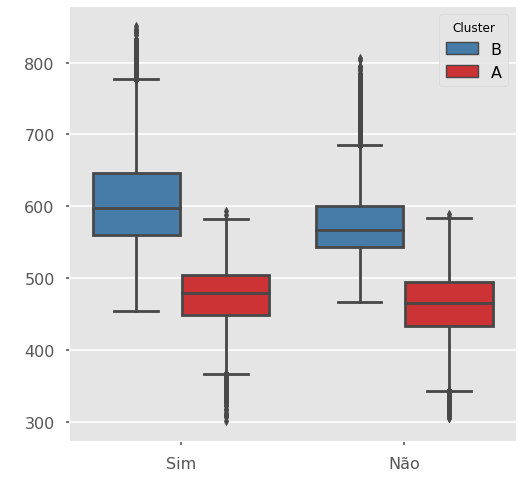

In [72]:
fig, ax = plt.subplots(figsize=(8, 8))

df = dadosEnem
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="Tem Computador", y="NU_MEDIA", hue="Cluster", data=df,palette=colors)
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")



Text(0, 0.5, ' ')

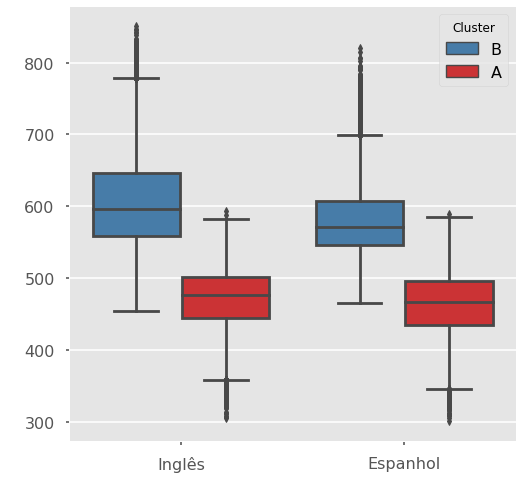

In [73]:
fig, ax = plt.subplots(figsize=(8, 8))

df = dadosEnem
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="TP_LINGUA", y="NU_MEDIA", hue="Cluster", data=df,palette=colors)
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")



Text(0, 0.5, ' ')

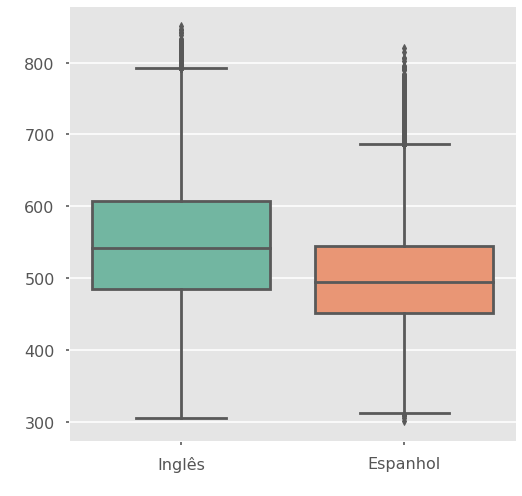

In [80]:
fig, ax = plt.subplots(figsize=(8, 8))

df = dadosEnem
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="TP_LINGUA", y="NU_MEDIA", data=df,palette=sns.color_palette("Set2"))
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")


In [81]:
dadosEnem.columns

Index(['TP_SEXO', 'TP_COR_RACA', 'CO_ESCOLA', 'NO_MUNICIPIO_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA',
       'NU_NOTA_REDACAO', 'CO_UF_ESC', 'Estudo Pai', 'Estudo Mãe',
       'Trabalho Pai', 'Trabalho Mãe', 'Tem Celular', 'Tem Computador',
       'Tem Internet', 'RendaMaxima', 'ClasseSocial', 'anosEstudoPai',
       'anosEstudoMae', 'COR_RACA', 'RazaoPessoasQuarto', 'PessoasPorQuarto',
       'NU_MEDIA', 'MEDIA_FAIXA', 'Cluster'],
      dtype='object')

Text(0, 0.5, ' ')

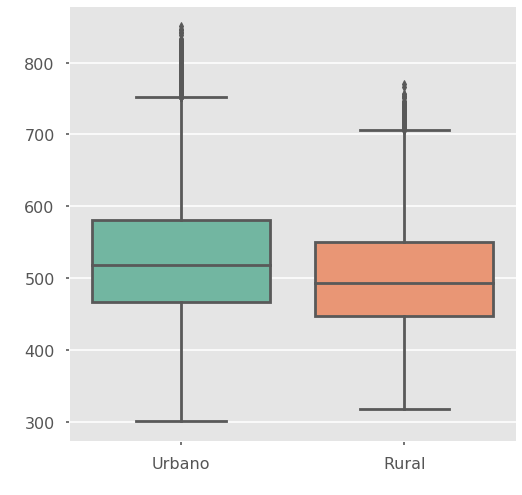

In [87]:
fig, ax = plt.subplots(figsize=(8, 8))

df = dadosEnem
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="TP_LOCALIZACAO_ESC", y="NU_MEDIA", data=df,palette=sns.color_palette("Set2"))
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")


Text(0, 0.5, ' ')

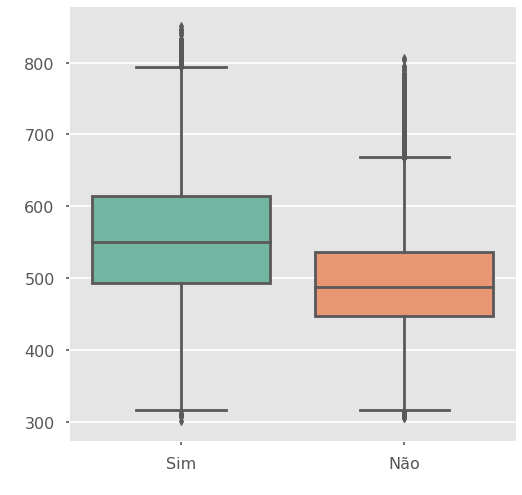

In [79]:
fig, ax = plt.subplots(figsize=(8, 8))

df = dadosEnem
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="Tem Computador", y="NU_MEDIA", data=df,palette=sns.color_palette("Set2"))
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")


Text(0, 0.5, ' ')

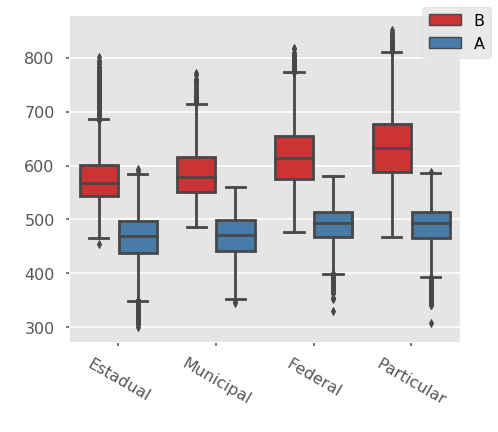

In [51]:
sns.set_palette(sns.color_palette("Set1"))
fig, ax = plt.subplots(figsize=(7, 6))
df = dadosEnem
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="TP_DEPENDENCIA_ADM_ESC", y="NU_MEDIA",  hue="Cluster", data=df,  order=['Estadual','Municipal','Federal','Particular'])
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
legend = G.legend(bbox_to_anchor=(1.1, 1.05))
G.set_xticklabels(G.get_xticklabels(),rotation=-30)
G.set_ylabel(" ")


Text(0, 0.5, ' ')

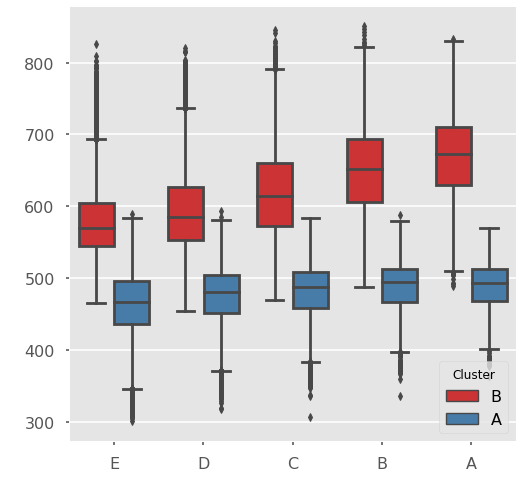

In [52]:
fig, ax = plt.subplots(figsize=(8, 8))
df = dadosEnem
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="ClasseSocial", y="NU_MEDIA", data=df,  hue="Cluster", order=['E','D','C','B','A'])
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")

Text(0, 0.5, ' ')

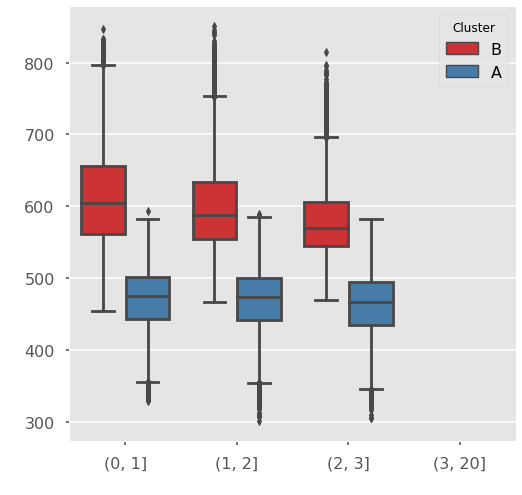

In [53]:
fig, ax = plt.subplots(figsize=(8, 8))

df = dadosEnem
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="PessoasPorQuarto", y="NU_MEDIA", hue="Cluster", data=df, order=['(0, 1]','(1, 2]','(2, 3]','(3, 20]'])
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")

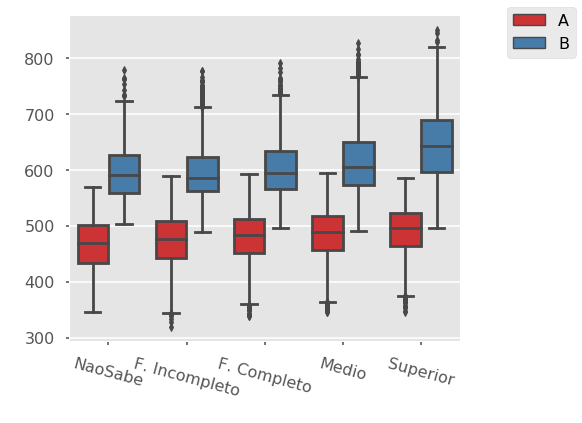

In [119]:
fig, ax = plt.subplots(figsize=(7, 6))
df = dadosEnem
G = sns.boxplot(x="Q002", y="mediaNota", data=df, hue="Cluster", order=['NaoSabe','FundamentalIncompleto','FundamentalCompleto','Medio','Superior'])
G.set_xticklabels(G.get_xticklabels(),rotation=-15)
G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")
legend = G.legend(bbox_to_anchor=(1.1, 1.05))


TypeError: boxplot() got an unexpected keyword argument 'legend'

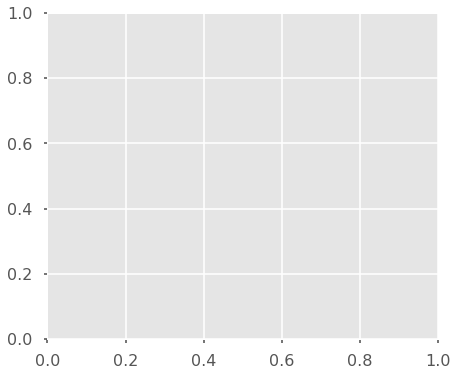

In [116]:
fig, ax = plt.subplots(figsize=(7, 6))
df = dadosEnem.query("TP_DEPENDENCIA_ADM_ESC == 'Particular'")
G = sns.boxplot(x="Q002", y="mediaNota", data=df, hue="Cluster", order=['NaoSabe','FundamentalIncompleto','FundamentalCompleto','Medio','Superior'])
G.set_xticklabels(G.get_xticklabels(),rotation=-10)
G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")
G.legend()

Text(0, 0.5, ' ')

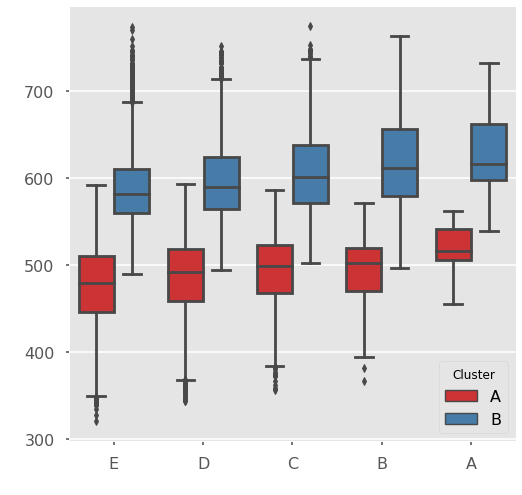

In [74]:
fig, ax = plt.subplots(figsize=(8, 8))
df = dadosEnem.query("TP_DEPENDENCIA_ADM_ESC == 'Estadual'")
G = sns.boxplot(x="ClasseSocial", y="mediaNota", data=df, hue="Cluster",order=['E','D','C','B','A'])
G.set_xlabel(" ")
G.set_ylabel(" ")

In [75]:
Estadual = dadosEnem.query("TP_DEPENDENCIA_ADM_ESC == 'Estadual'")
total = Estadual.shape[0]

In [76]:
info = {} 
info['naoSabe'] =  {}
info['naoSabe']['A'] =  Estadual.query("Q002 == 'NaoSabe' and Cluster == 0").shape[0]/total
info['naoSabe']['B'] =  Estadual.query("Q002 == 'NaoSabe' and Cluster == 1").shape[0]/total



info['incompleto'] = {}
info['incompleto']['A'] =  Estadual.query("Q002 == 'FundamentalIncompleto' and Cluster == 0").shape[0]/total
info['incompleto']['B'] =  Estadual.query("Q002 == 'FundamentalIncompleto' and Cluster == 1").shape[0]/total
info['completo'] = {}
info['completo']['A'] =  Estadual.query("Q002 == 'FundamentalCompleto' and Cluster == 0").shape[0]/total
info['completo']['B'] =  Estadual.query("Q002 == 'FundamentalCompleto' and Cluster == 1").shape[0]/total
info['medio'] = {}
info['medio']['A'] =  Estadual.query("Q002 == 'Medio' and Cluster == 0").shape[0]/total
info['medio']['B'] =  Estadual.query("Q002 == 'Medio' and Cluster == 1 ").shape[0]/total
info['superior'] = {}     
info['superior']['A'] =  Estadual.query("Q002 == 'Superior' and Cluster == 0").shape[0]/total
info['superior']['B'] =  Estadual.query("Q002 == 'Superior' and Cluster == 1").shape[0]/total




Text(0, 0.5, 'Porcentagem do TOTAL de alunos de escola estadual')

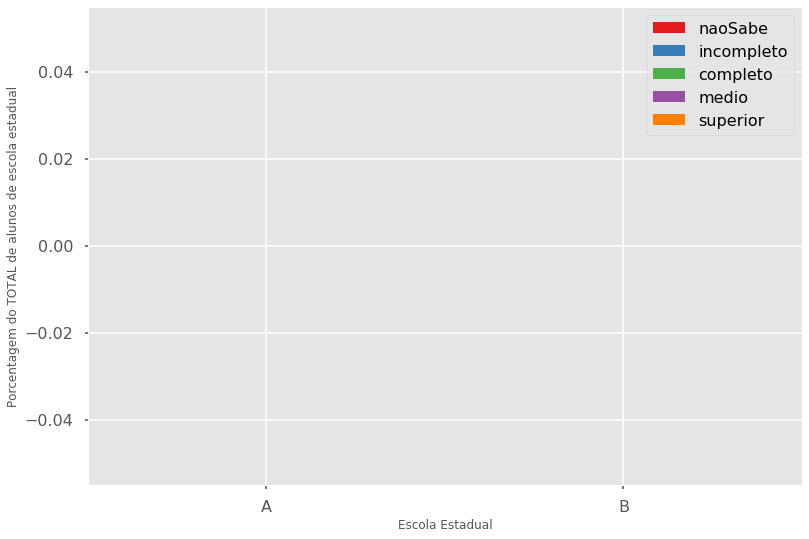

In [77]:
dados = pd.DataFrame(info)
ax = dados.plot(kind='bar')
ax.set_xlabel("Escola Estadual")
ax.set_xticklabels(ax.get_xticklabels(),rotation="0")
ax.set_ylabel("Porcentagem do TOTAL de alunos de escola estadual")

In [78]:
current_palette = sns.color_palette()
current_palette[:2]
#sns.palplot(current_palette)

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804)]